<a href="https://colab.research.google.com/github/bailu-bot/CodeBank/blob/main/clustering/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this notebook we'll take a look at how we can cluster a set of chemical structures using the k-means algorithm. **It's important to note that there is a stochastic component to k-means clusterinh.  The results you see may differ from the published version of this notebook.**

Install the necessary Python libraries

In [1]:
%%capture
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install useful_rdkit_utils pandas scikit-learn tqdm numpy seaborn mols2grid matplotlib

Import the necessary Python libraries

In [2]:
import pandas as pd
import useful_rdkit_utils as uru
from rdkit import Chem
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from tqdm.auto import tqdm
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import mols2grid
import matplotlib.cm as cm

Enable Pandas [progress_apply](https://towardsdatascience.com/progress-bars-in-python-and-pandas-f81954d33bae)

In [3]:
tqdm.pandas()

In [22]:
import matplotlib.pyplot as plt

Set up Seaborn plot aesthetics

In [4]:
sns.set()
sns.set(rc={'figure.figsize': (10, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')

Read the input data

In [5]:
smiles_url = "https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/cluster_test.smi"
df = pd.read_csv(smiles_url,sep=" ",names=["SMILES","Name"])

Add molecular fingerprints to the dataframe

In [6]:
smi2fp = uru.Smi2Fp()
df['fp'] = df.SMILES.progress_apply(smi2fp.get_np)

  0%|          | 0/735 [00:00<?, ?it/s]

Convert the fingerprints to an X matrix to make sklearn happy

In [7]:
X = np.stack(df.fp)

使用层次聚类

In [55]:
import scipy.cluster.hierarchy as shc
Z=shc.linkage(np.stack(X), method='ward')

Clustering with k-means only requires a few lines of code

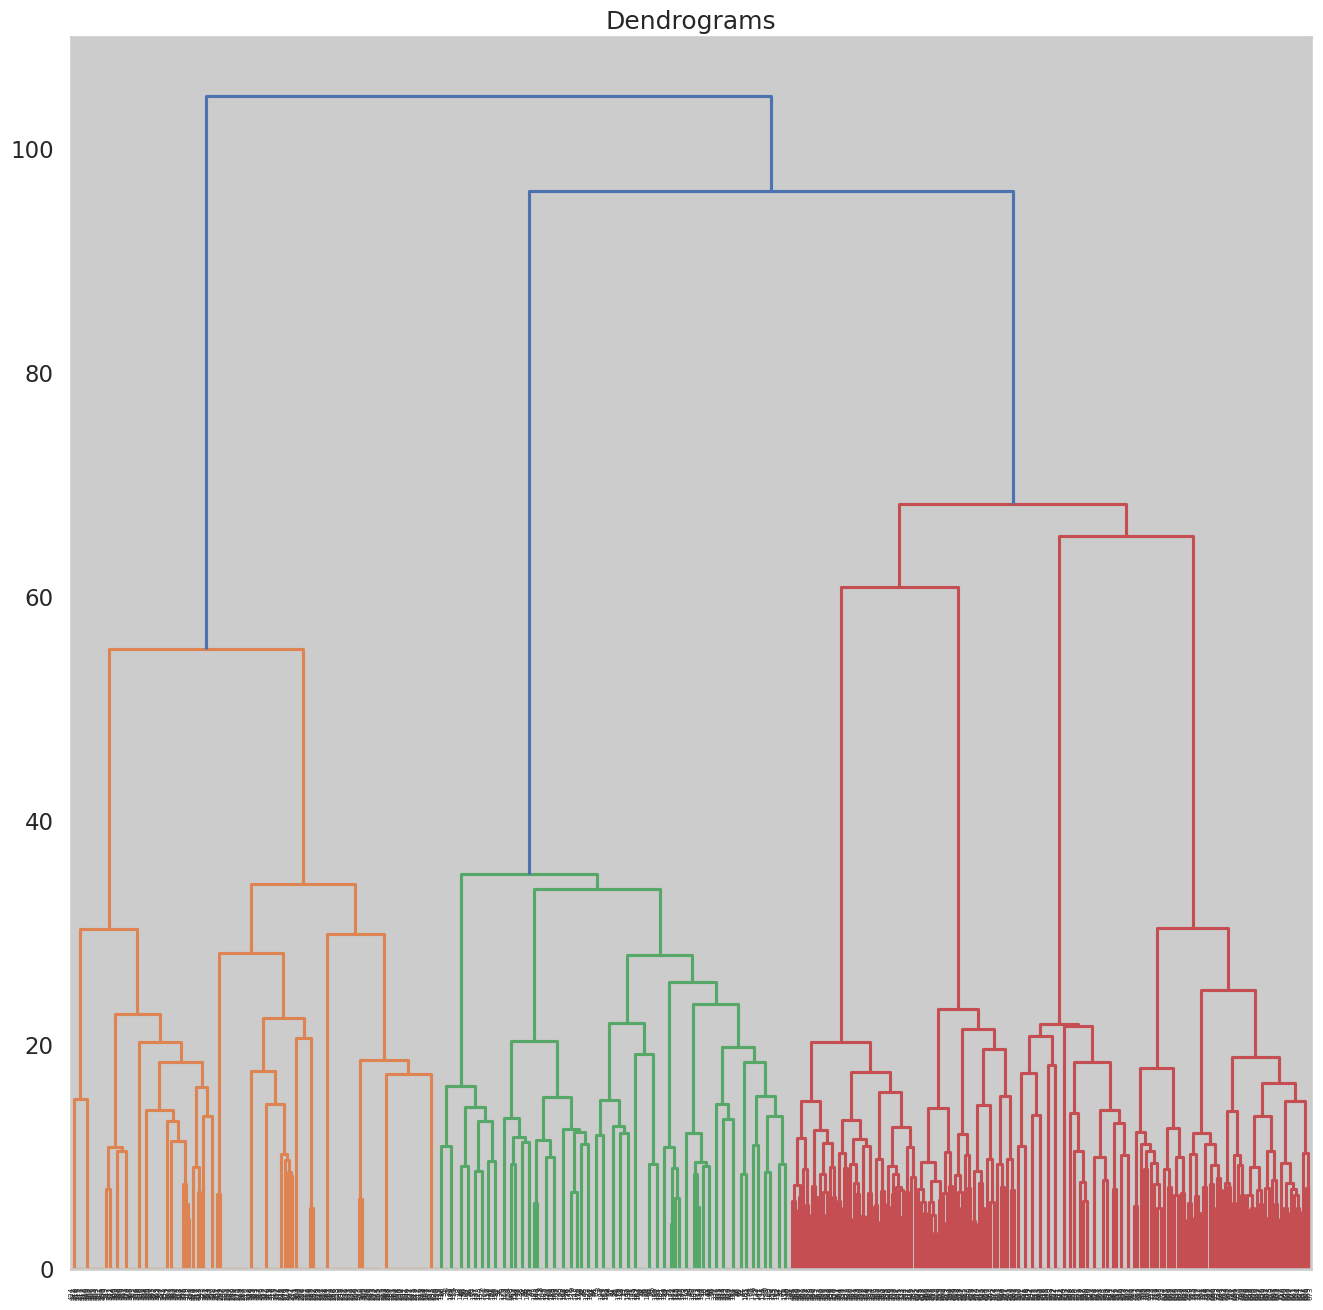

In [56]:

plt.figure(figsize=(16, 16))
plt.title("Dendrograms")
dend = shc.dendrogram(Z)

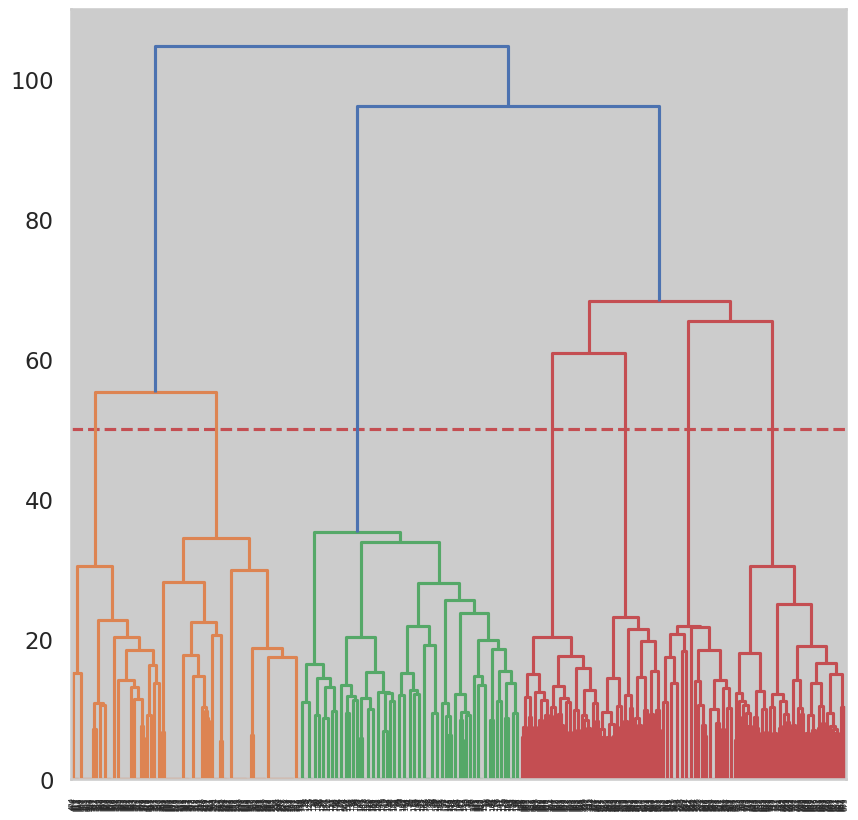

In [61]:
plt.axhline(y=50, color='r', linestyle='--')
dend = shc.dendrogram(Z)

In [67]:
from sklearn.cluster import AgglomerativeClustering
cluster_list= AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
cluster_list.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Plot the cluster populations

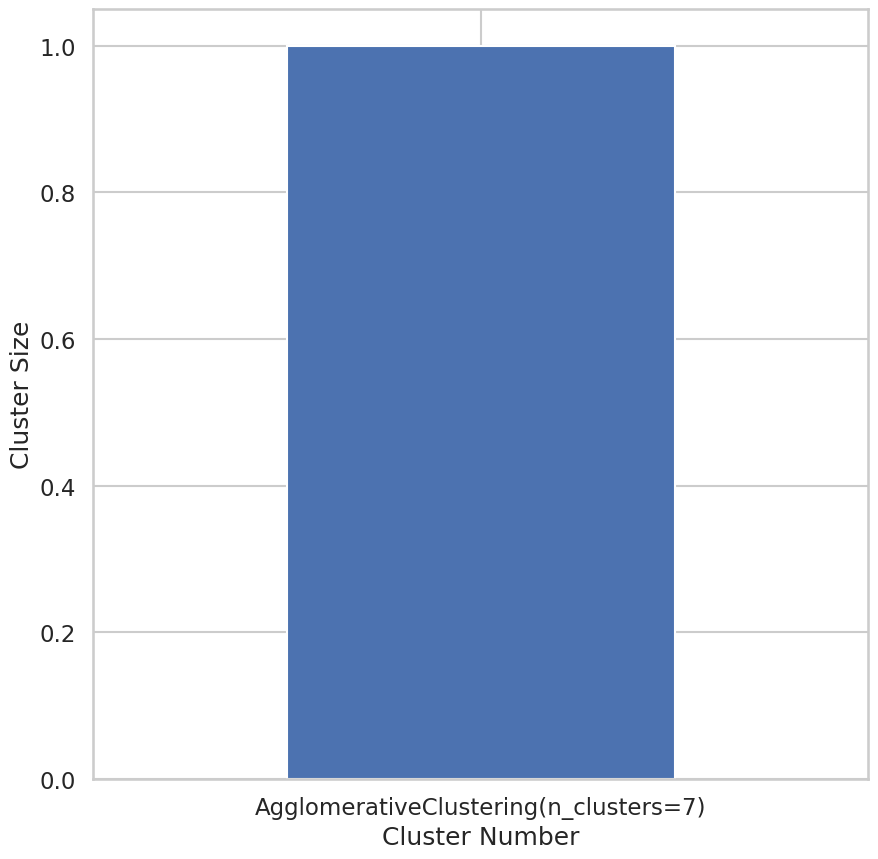

In [68]:
ax = pd.Series(cluster_list).value_counts().sort_index().plot(kind="bar")
ax.set_xlabel("Cluster Number")
ax.set_ylabel("Cluster Size")
ax.tick_params(axis='x', rotation=0)

One potential drawback of k-means clustering is that it requires you to specify the number of clusters.  One means of determining the optimal number of clusters is by maximizing the silhouette score.

Silhouette Score =  $\frac{(a-b)}{max(a,b)}$ where **a** is the average intracluster distance and **b** is the average intercluster distance.  The Silhouette Score ranges between -1 and 1 with a vaule closer to 1 representing a good match between a point and other members of the same cluster.  

In [10]:
cluster_range = range(5,25)
score_list = []
for k in tqdm(cluster_range):
    km = KMeans(n_clusters=k,random_state=42,n_init='auto')
    cluster_labels = km.fit_predict(X)
    score = silhouette_score(X,cluster_labels)
    score_list.append([k,score])

  0%|          | 0/20 [00:00<?, ?it/s]

Put the silhouette scores into a dataframe

In [11]:
score_df = pd.DataFrame(score_list,columns=["K","Silhouette Score"])
score_df.head()

,K,Silhouette Score
0,5,0.256244
1,6,0.200516
2,7,0.187920
3,8,0.272224
4,9,0.222486


Plot the silhouette scores as a function of the number of clusters

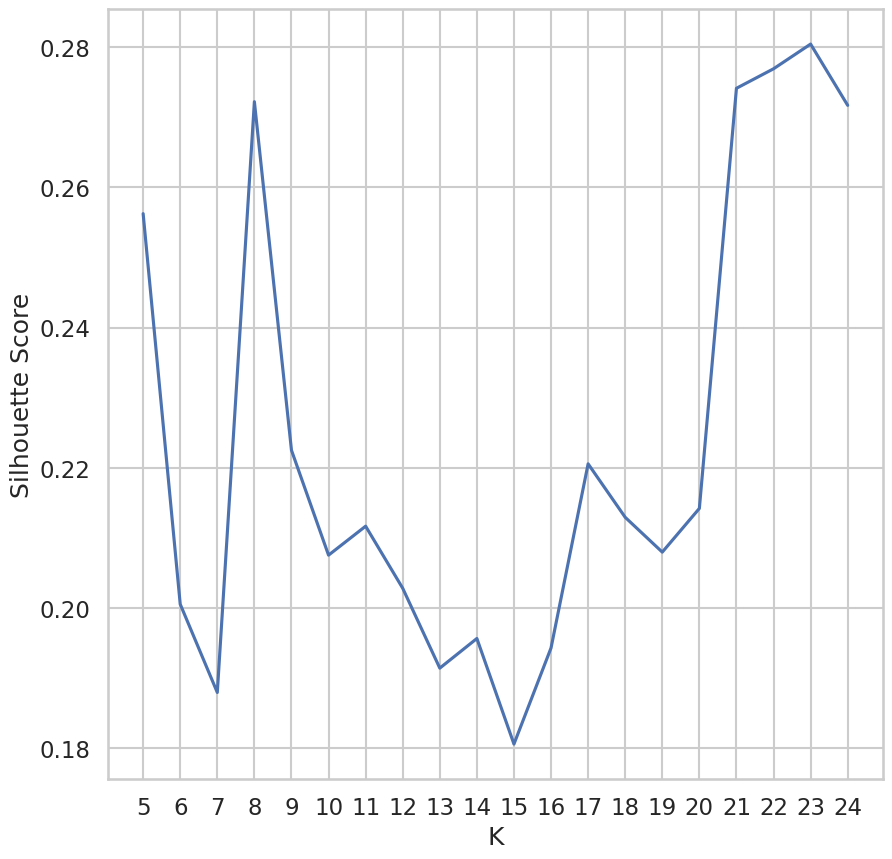

In [12]:
ax = sns.lineplot(x="K",y="Silhouette Score",data=score_df)
ax.set_xticks(cluster_range);

In [13]:
opt_num_clusters = score_df.sort_values("Silhouette Score").K.values[0]
print(f"In the figure above the minimum silhouette score is observed with {opt_num_clusters} clusters.  Let's run KMeans with num_clusters = {opt_num_clusters}.")

In the figure above the minimum silhouette score is observed with 15 clusters.  Let's run KMeans with num_clusters = 15.


In [14]:
num_clusters = opt_num_clusters
km_opt = KMeans(n_clusters=num_clusters, random_state=42, n_init="auto")
clusters_opt = km_opt.fit_predict(X)

Routine to plot a silhouette plot

In [15]:
def silhouette_plot(X,cluster_labels):
    """
    Adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    """
    sns.set_style('whitegrid')
    sample_df = pd.DataFrame(silhouette_samples(X,cluster_labels),columns=["Silhouette"])
    sample_df['Cluster'] = cluster_labels
    n_clusters = max(cluster_labels+1)
    color_list = [cm.nipy_spectral(float(i) / n_clusters) for i in range(0,n_clusters)]
    ax = sns.scatterplot()
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_avg = silhouette_score(X, cluster_labels)
    y_lower = 10
    unique_cluster_ids = sorted(sample_df.Cluster.unique())
    for i in unique_cluster_ids:
        cluster_df = sample_df.query('Cluster == @i')
        cluster_size = len(cluster_df)
        y_upper = y_lower + cluster_size
        ith_cluster_silhouette_values = cluster_df.sort_values("Silhouette").Silhouette.values
        color = color_list[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i),fontsize="small")
        y_lower = y_upper + 10
    ax.axvline(silhouette_avg,color="red",ls="--")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Cluster")
    ax.set(yticklabels=[])
    ax.yaxis.grid(False)

Plot a sihouette plot for the clustering above.  When we do this, we're looking for two things.
1. How uniform are the sizes of the clusters (represeneted by the widths of the bars in the plot below).
2. How consistent are the Silhoutte Scores for the inidividual clusters.

In the plot below, the red dashed line shows the average silhouette score for the clusters.  Are the peaks for each cluster near the line.  Usually there are one or two outliers.

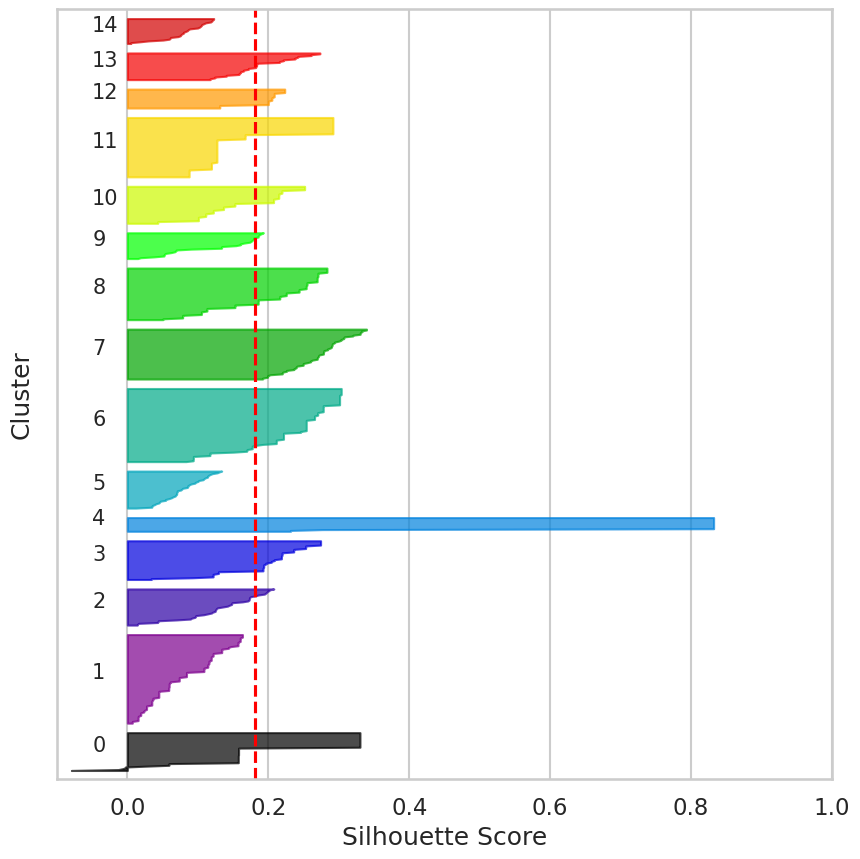

In [16]:
silhouette_plot(X,clusters_opt)

Make a TSNE plot of the clustering

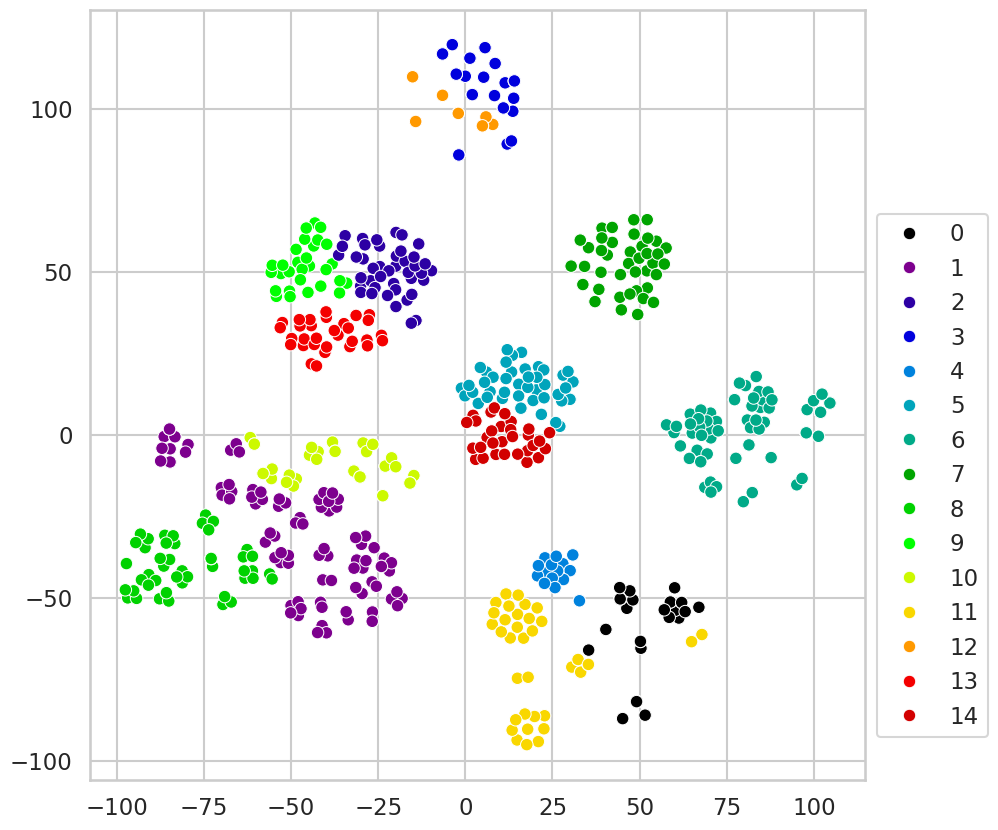

In [17]:
tsne = TSNE(n_components=2, init='pca',learning_rate='auto')
crds = tsne.fit_transform(X,clusters_opt)
color_list = [cm.nipy_spectral(float(i) / num_clusters) for i in range(0,num_clusters)]
ax = sns.scatterplot(x=crds[:,0],y=crds[:,1],hue=clusters_opt,palette=color_list,legend=True)
ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.75), ncol=1);

Add a cluster column to our input dataframe

In [18]:
opt_cluster_df = df.copy()
opt_cluster_df['Cluster'] = clusters_opt

Display structures of the cluster members

In [19]:
cluster_id = 1
cols = ["SMILES","Name","Cluster"]
display_df = opt_cluster_df[cols].query("Cluster == @cluster_id")
mols2grid.display(display_df,subset=["img"],n_cols=3,size=(320,240))

MolGridWidget()

Write the clusters to a csv file

In [20]:
opt_cluster_df[["SMILES","Name","Cluster"]].to_csv("clusters.csv",index=False)